In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score

In [425]:
train_df = pd.read_csv("Train_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

In [426]:
test_df.columns

Index(['ID1', 'Specific ailments', 'ID2', 'Food preference', 'Age', 'BMI',
       'Smoker?', 'Living in?', 'Any heriditary condition?', 'Follow Diet',
       'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
       'Social interaction', 'Taking supplements', 'Mental health management',
       'Illness count last year'],
      dtype='object')

In [427]:
train_df.columns = ["ID1","ailments","ID2","food_pref","age","bmi","smoker","area","here","diet","physical","sleeping","alcohol","social","supplements","mental","illness","healthy"]
test_df.columns = ["ID1","ailments","ID2","food_pref","age","bmi","smoker","area","here","diet","physical","sleeping","alcohol","social","supplements","mental","illness"]

In [428]:
all_df = pd.concat(([train_df,test_df]))
all_df.shape

(32400, 18)

In [429]:
all_df.isna().sum()

ID1               0
ailments          0
ID2               0
food_pref        13
age               0
bmi               0
smoker            0
area              0
here              0
diet           1235
physical       1235
sleeping       1235
alcohol        1235
social         1235
supplements    1235
mental         1235
illness        1235
healthy        6480
dtype: int64

### 1.ID1

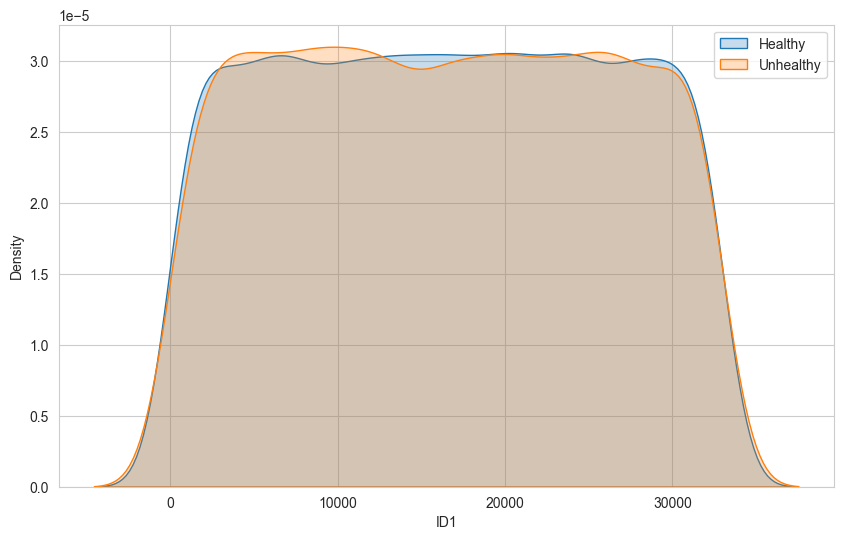

In [430]:
plt.figure(figsize=(10,6))
sns.kdeplot(train_df[train_df.healthy==1].ID1,fill=True,label="Healthy")
sns.kdeplot(train_df[train_df.healthy==0].ID1,fill=True,label="Unhealthy")
# sns.kdeplot(test_df.ID1,fill=True,label="Test Data")
plt.legend()
plt.show()

### 2.ID2

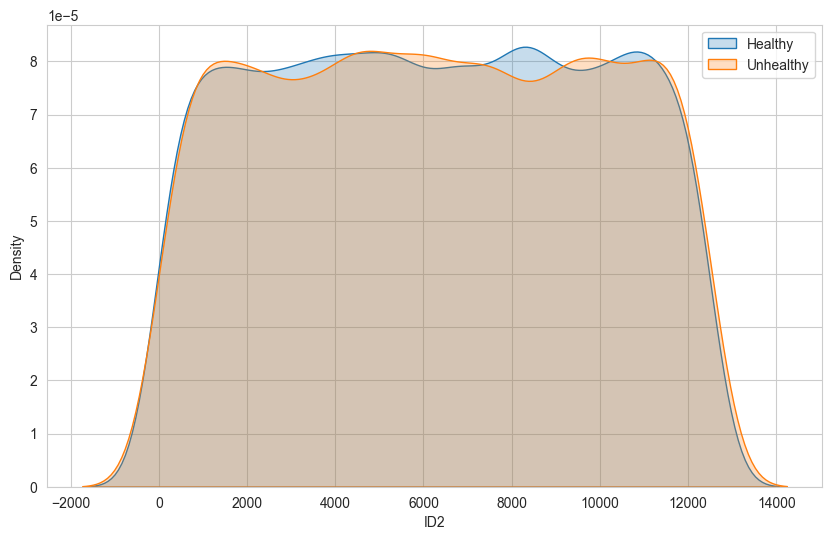

In [431]:
plt.figure(figsize=(10,6))
sns.kdeplot(train_df[train_df.healthy==1].ID2,fill=True,label="Healthy")
sns.kdeplot(train_df[train_df.healthy==0].ID2,fill=True,label="Unhealthy")
# sns.kdeplot(test_df.ID2,fill=True,label="Test Data")
plt.legend()
plt.show()

### 3.Specific Ailments

In [432]:
train_df["ailments"].nunique()

53

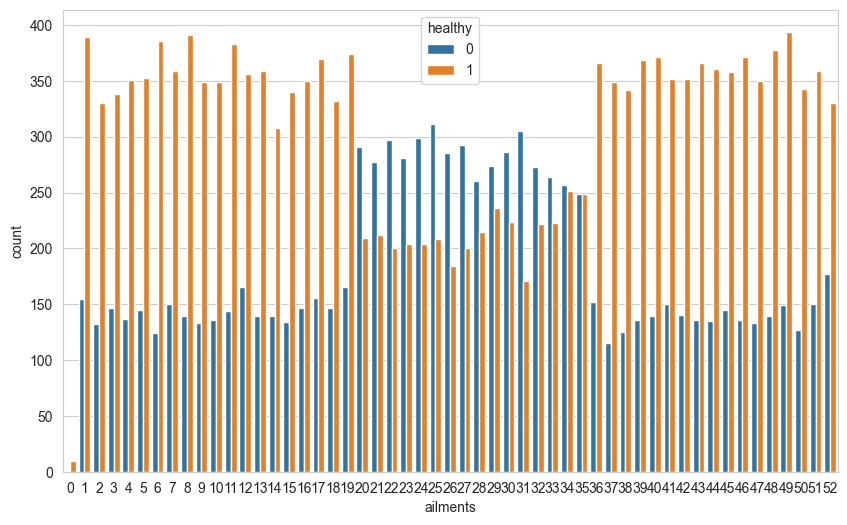

In [433]:
plt.figure(figsize=(10,6))
sns.countplot(x=train_df["ailments"],hue=train_df.healthy)
plt.show()

In [434]:
ailment_counts = train_df.groupby('ailments')['healthy'].sum()
total_counts = train_df['ailments'].value_counts()
healthy_percentage = (ailment_counts / total_counts) * 100

# Create the 'health' DataFrame
health = pd.DataFrame({
    'ailments': ailment_counts.index,
    'healthy_percentage': healthy_percentage
})
health


,ailments,healthy_percentage
ailments,,
0,0,100.000000
1,1,71.507353
2,2,71.428571
3,3,69.690722
4,4,71.926230
5,5,70.883534
6,6,75.686275
7,7,70.530452
8,8,73.773585


### 4.Food Preference

In [435]:
dx_labels = ['DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']

all_df.food_pref = all_df.food_pref.astype("string")

# Iterate over the DX labels and create columns
for dx in dx_labels:
    all_df[dx] = all_df['food_pref'].apply(lambda x: False if pd.isna(x) else dx in x.split())

all_df.drop(columns=["food_pref"],inplace=True)

### 5. Age

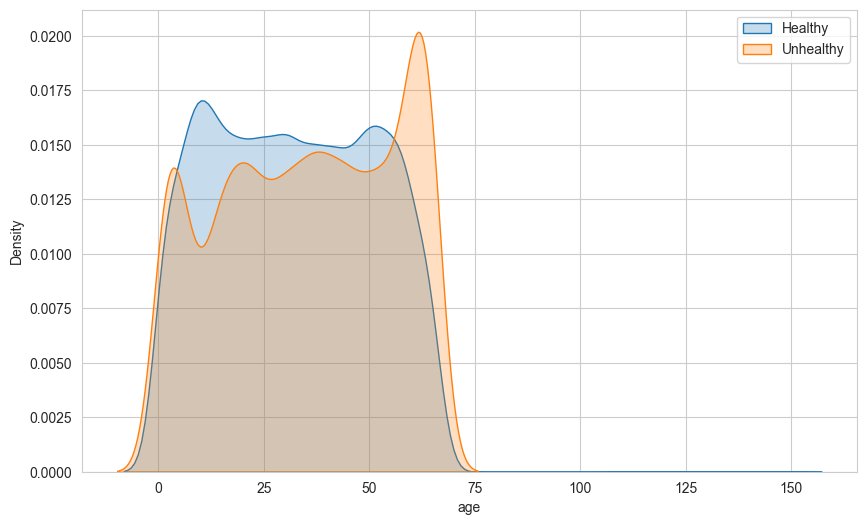

In [436]:
plt.figure(figsize=(10,6))
sns.kdeplot(train_df[train_df.healthy==1].age,fill=True,label="Healthy")
sns.kdeplot(train_df[train_df.healthy==0].age,fill=True,label="Unhealthy")
# sns.kdeplot(test_df.Age,fill=True,label="Test Data")
plt.legend()
plt.show()

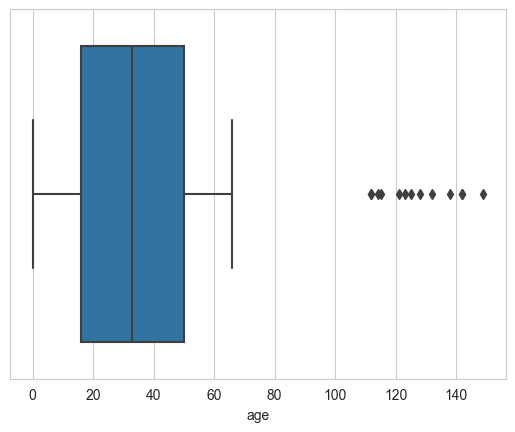

In [437]:
sns.boxplot(x=all_df.age)
plt.show()

In [438]:
# handling outliers
Q1 = all_df.age.quantile(0.25)
Q3 = all_df.age.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# clippin the bmi
all_df.age = all_df.age.clip(lower=lower_bound,upper=upper_bound)

### 6.BMI

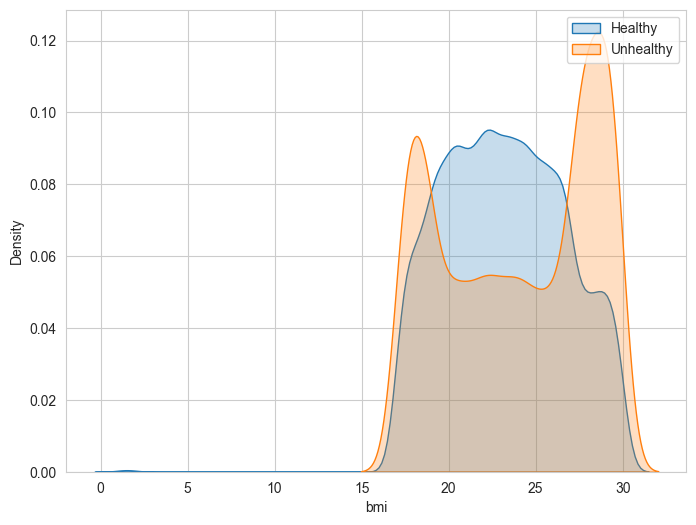

In [439]:
plt.figure(figsize=(8,6))
sns.kdeplot(train_df[train_df.healthy==1].bmi,fill=True,label="Healthy")
sns.kdeplot(train_df[train_df.healthy==0].bmi,fill=True,label="Unhealthy")
# sns.kdeplot(test_df.BMI,fill=True,label="Test Data")
plt.legend()
plt.show()

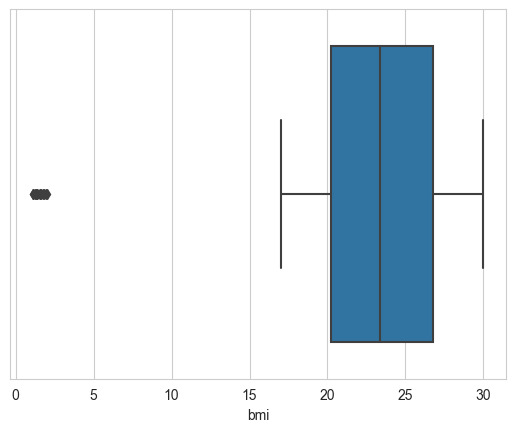

In [440]:
# handling outliers
sns.boxplot(x=all_df.bmi)
plt.show()

In [441]:
Q1 = all_df.bmi.quantile(0.25)
Q3 = all_df.bmi.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# clippin the bmi
all_df.bmi = all_df.bmi.clip(lower=lower_bound,upper=upper_bound)

In [442]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'all_df' is your dataframe
# Create an instance of MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Reshape the 'bmi' column to a 2D array as MinMaxScaler expects a 2D input
bmi_data = all_df['bmi'].values.reshape(-1, 1)

# Scale the 'bmi' column using MinMaxScaler
scaled_bmi = scaler.fit_transform(bmi_data)

# Assign the scaled values back to the 'bmi' column in the 'all_df' dataframe
all_df['bmi'] = scaled_bmi


### 7.Smoker

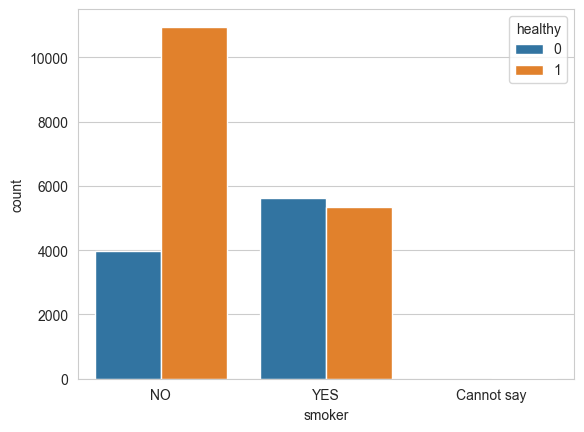

In [443]:
sns.countplot(x=train_df["smoker"],hue=train_df.healthy)
plt.show()

In [444]:
all_df.head()

,ID1,ailments,ID2,age,bmi,smoker,area,here,diet,physical,...,supplements,mental,illness,healthy,DX1,DX2,DX3,DX4,DX5,DX6
0,2408,44,2668,49,0.034007,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1.0,False,False,False,False,False,True
1,25063,39,10363,20,0.601059,NO,URBAN,Stable,0.0,0.0,...,0.0,0.0,1.0,1.0,False,False,True,True,False,False
2,26798,29,132,1,0.127605,NO,URBAN,Stable,1.0,0.0,...,0.0,0.0,1.0,0.0,False,False,False,False,False,True
3,31907,27,10499,30,0.512247,NO,RURAL,Stable,1.0,0.0,...,0.0,0.0,1.0,1.0,True,False,False,False,False,False
4,26412,9,7963,40,-0.082393,YES,RURAL,Stable,1.0,0.0,...,0.0,0.0,2.0,1.0,False,False,False,False,False,True


In [445]:
encoded_area = pd.get_dummies(all_df['smoker'], prefix='smoker')

# Drop the original 'area' column
all_df = all_df.drop('smoker', axis=1)

# Append the encoded columns to the original DataFrame
all_df = pd.concat([all_df, encoded_area], axis=1)

### 8.Urban or Rural

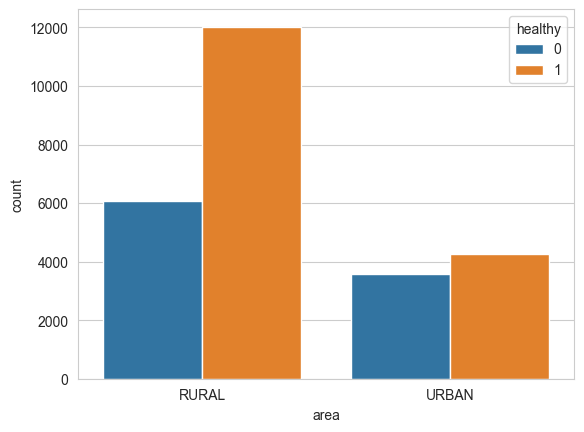

In [446]:
sns.countplot(x=train_df["area"],hue=train_df.healthy)
plt.show()

In [447]:
encoded_area = pd.get_dummies(all_df['area'], prefix='area')

# Drop the original 'area' column
all_df = all_df.drop('area', axis=1)

# Append the encoded columns to the original DataFrame
all_df = pd.concat([all_df, encoded_area], axis=1)

# Print the updated 'all_df' DataFrame


In [448]:
all_df.head()

,ID1,ailments,ID2,age,bmi,here,diet,physical,sleeping,alcohol,...,DX2,DX3,DX4,DX5,DX6,smoker_Cannot say,smoker_NO,smoker_YES,area_RURAL,area_URBAN
0,2408,44,2668,49,0.034007,Stable,1.0,0.0,0.0,0.0,...,False,False,False,False,True,False,True,False,True,False
1,25063,39,10363,20,0.601059,Stable,0.0,0.0,0.0,0.0,...,False,True,True,False,False,False,True,False,False,True
2,26798,29,132,1,0.127605,Stable,1.0,0.0,0.0,0.0,...,False,False,False,False,True,False,True,False,False,True
3,31907,27,10499,30,0.512247,Stable,1.0,0.0,0.0,0.0,...,False,False,False,False,False,False,True,False,True,False
4,26412,9,7963,40,-0.082393,Stable,1.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,True,True,False


### 9. Any Heriditary condition
Dropping this column as it has only one value

In [449]:
train_df.drop(columns=["here"],inplace=True)
test_df.drop(columns=["here"],inplace=True)
all_df.drop(columns=["here"],inplace=True)

### 10.Follow Diet

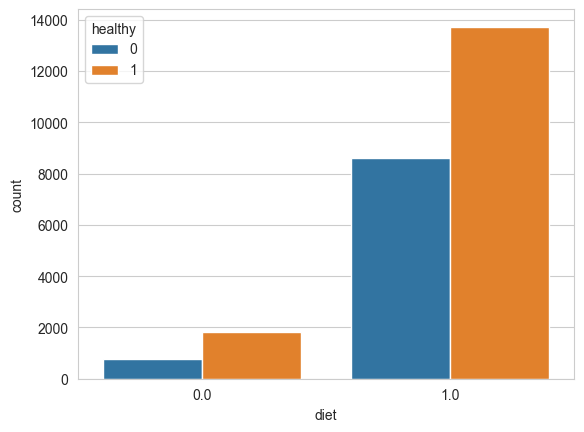

In [450]:
sns.countplot(x=train_df["diet"],hue=train_df.healthy)
plt.show()

### 11.Physical Activity

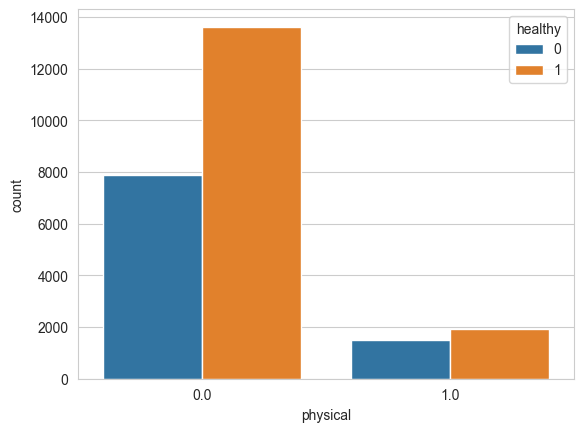

In [451]:
sns.countplot(x=train_df["physical"],hue=train_df.healthy)
plt.show()

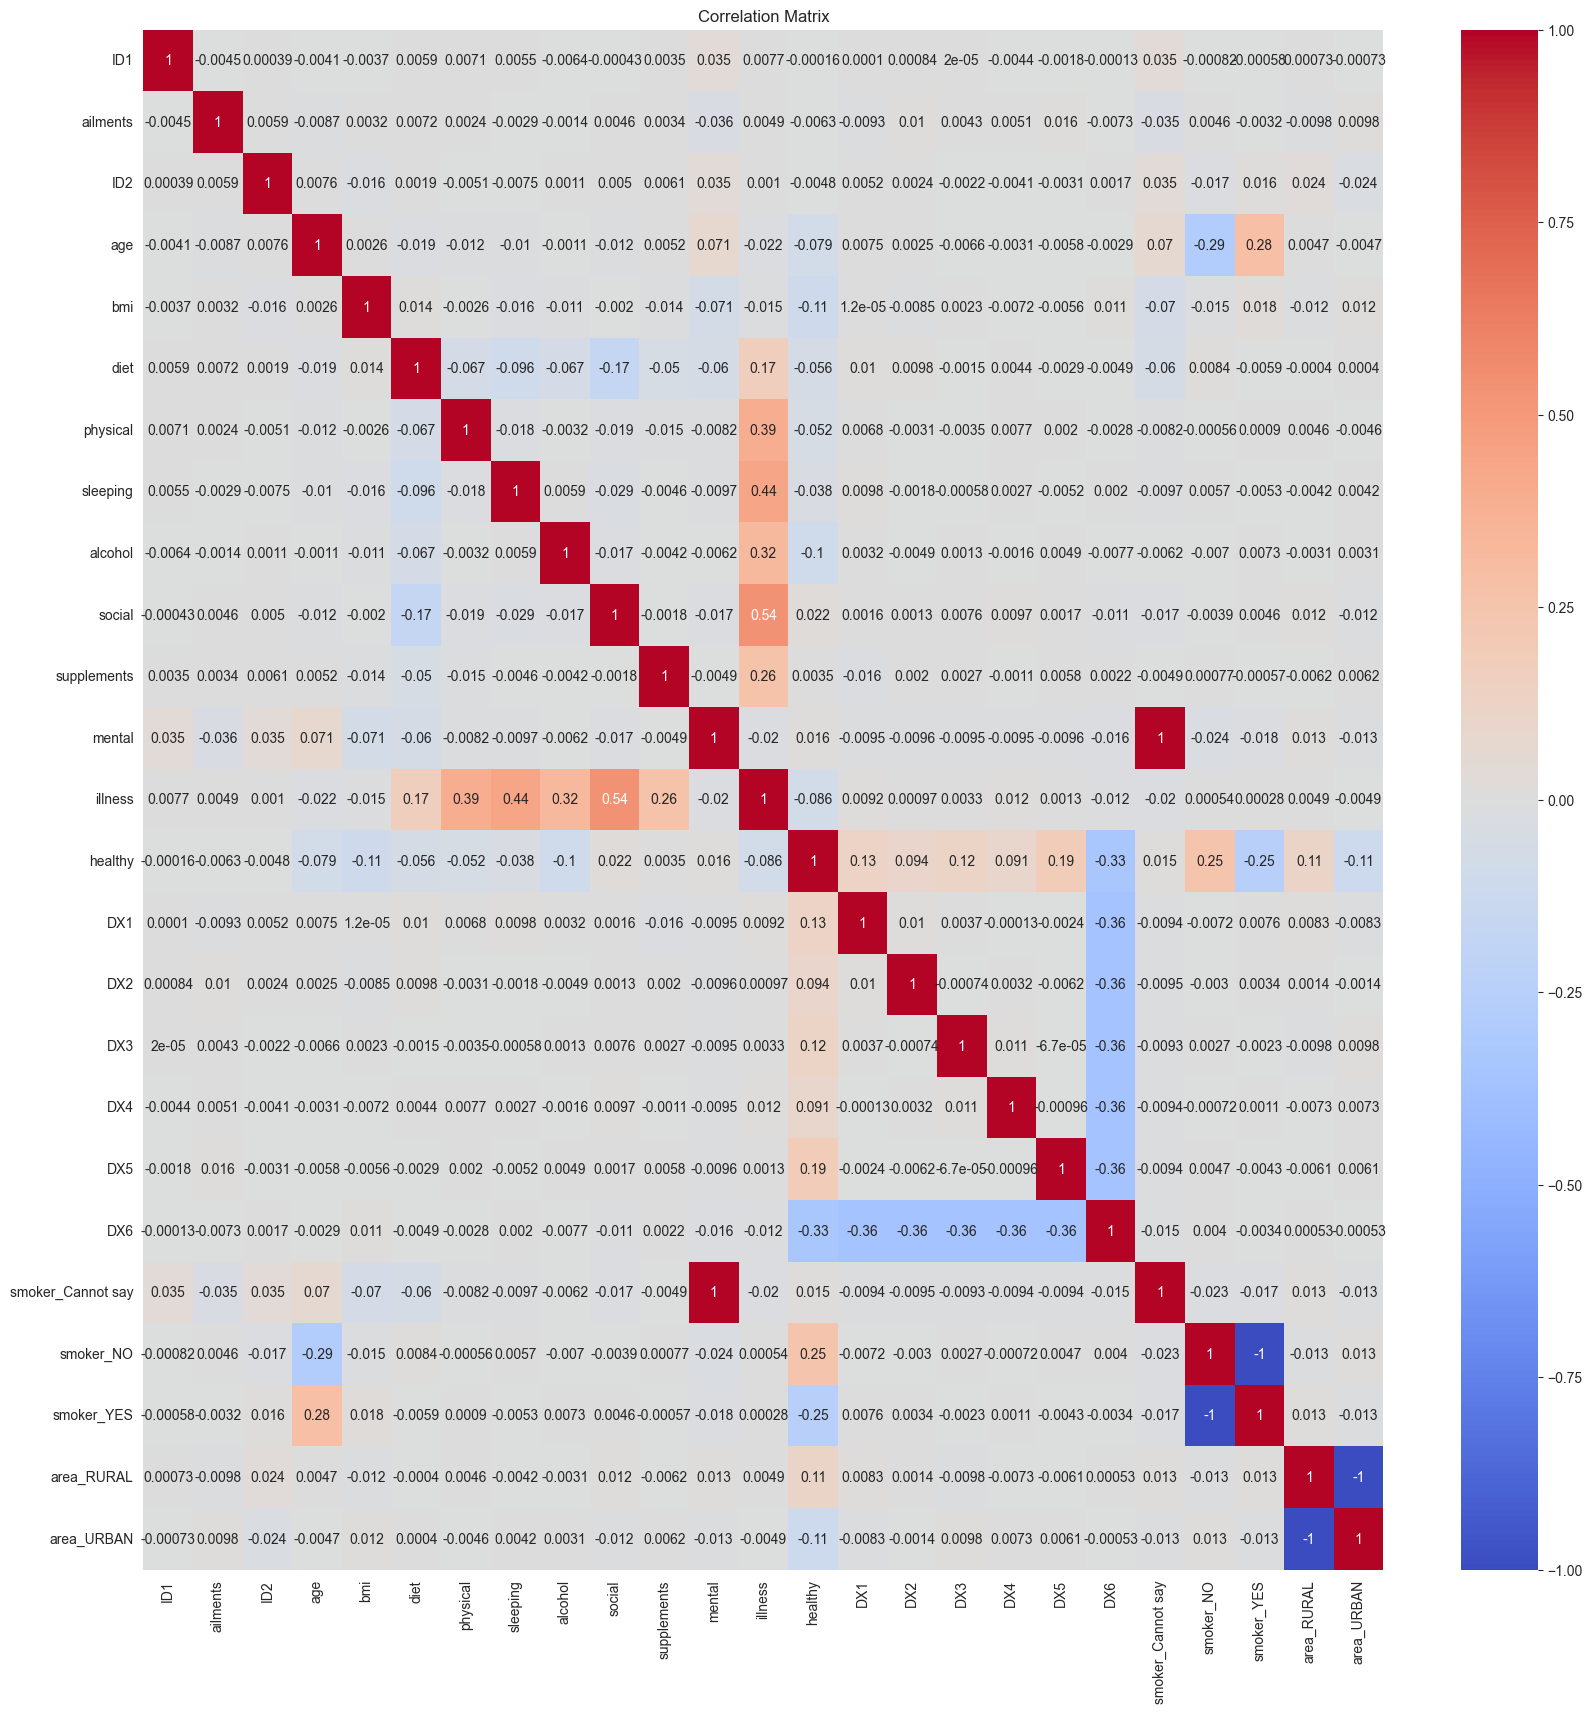

In [453]:
corr_matrix = all_df.corr()

center = 0

# Define the colormap with emphasis on values away from zero
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Normalize the correlation matrix manually
max_abs = np.abs(corr_matrix.values).max()
norm_corr_matrix = corr_matrix / max_abs

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(norm_corr_matrix, annot=True, cmap=cmap, center=center, vmin=-1, vmax=1)

# Add a title to the plot
plt.title("Correlation Matrix")

# Display the plot
plt.show()

In [454]:
# since mental has depndence 1 on smoker_cannot say so drop mental
all_df.drop(columns=["mental"],inplace=True)

In [455]:
from sklearn.impute import SimpleImputer

# Define the columns with null values
columns_with_null = ["diet", "physical", "sleeping", "alcohol", "social", "supplements", "illness"]

# Create an instance of SimpleImputer with "most_frequent" strategy
imputer = SimpleImputer(strategy="most_frequent")

# Fit the imputer on the DataFrame and transform the selected columns
all_df[columns_with_null] = imputer.fit_transform(all_df[columns_with_null])


In [456]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [457]:
models = [RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier(),LGBMClassifier(),CatBoostClassifier(verbose=False)]

In [458]:
train_df = all_df[all_df['healthy'].notnull()].copy()
test_df = all_df[all_df['healthy'].isnull()].copy()

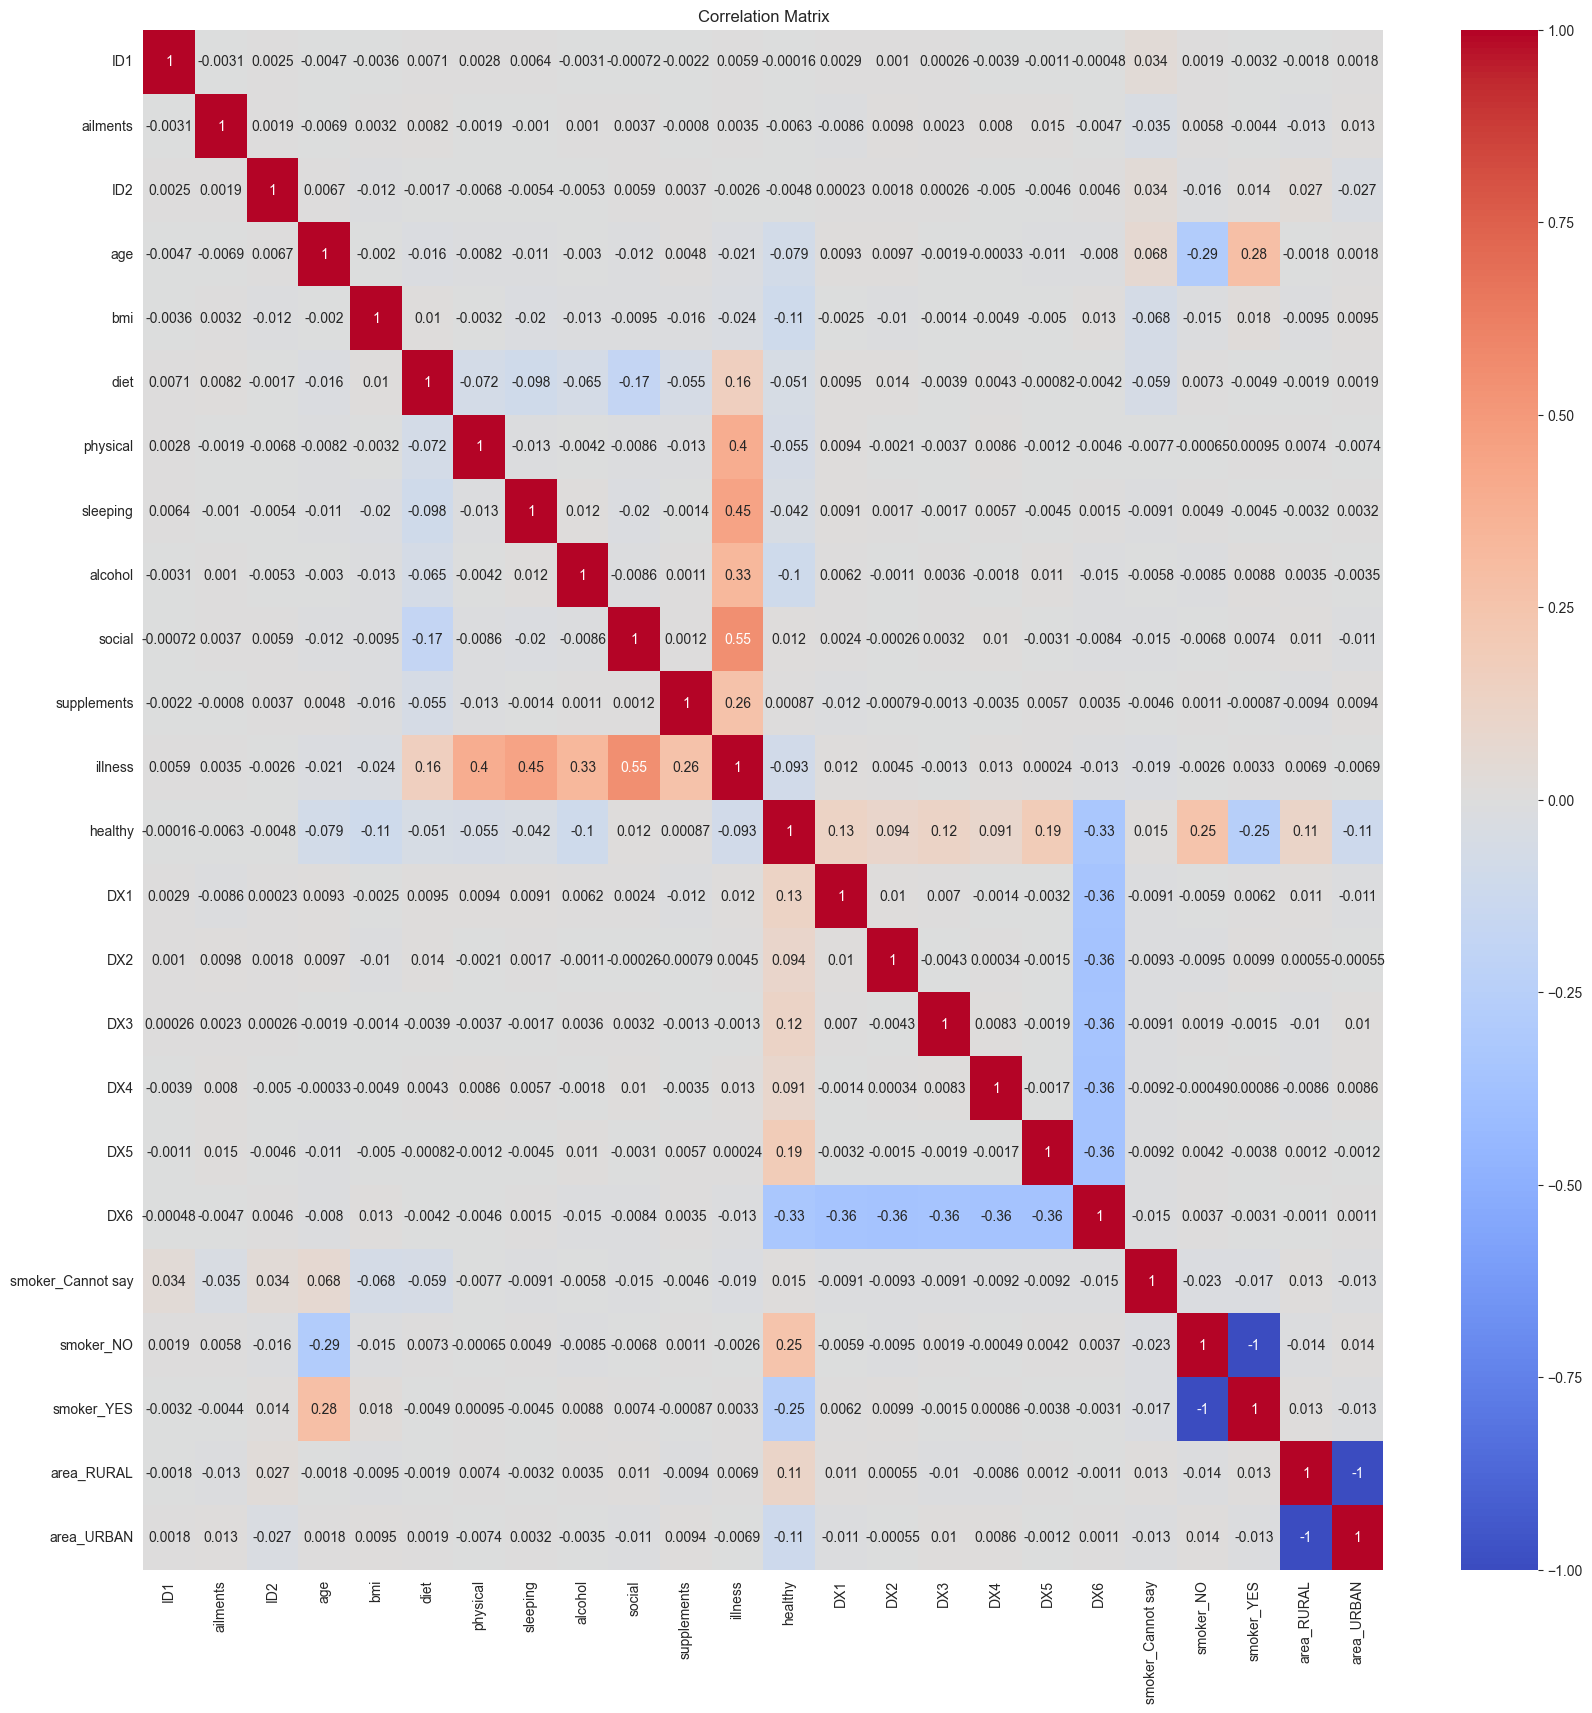

In [459]:
corr_matrix = train_df.corr()

center = 0

# Define the colormap with emphasis on values away from zero
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Normalize the correlation matrix manually
max_abs = np.abs(corr_matrix.values).max()
norm_corr_matrix = corr_matrix / max_abs

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(norm_corr_matrix, annot=True, cmap=cmap, center=center, vmin=-1, vmax=1)

# Add a title to the plot
plt.title("Correlation Matrix")

# Display the plot
plt.show()

In [460]:
X = train_df.drop(columns=["healthy"])
y = train_df.healthy
X_test = test_df.drop(columns=["healthy"])

In [461]:
def cross_val_score_custom(model, X, y):
    model_name = type(model).__name__
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy",n_jobs=-1)
    mean_score = scores.mean()
    print(f"Accuracy for the prediction is {model_name}: {mean_score:.4f}")

In [462]:
# for model in models:
#     cross_val_score_custom(model,X,y)

In [468]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# Create the decision tree classifier
dt_classifier = XGBClassifier()

# Define the parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the ensemble
    'max_depth': [3, 5, 7, 9],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate for each boosting iteration
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
    'min_child_weight': [1, 3, 5]  # Minimum sum of instance weight needed in a child
}

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the RandomizedSearchCV object with StratifiedKFold as 'cv'
random_search = RandomizedSearchCV(
    estimator=dt_classifier,
    param_distributions=param_grid,
    cv=skf,
    n_iter=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X, y)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Get the best model
best_model = random_search.best_estimator_


Best Parameters:  {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best Score:  0.8375


In [ ]:
# threshold_range = np.linspace(0.4, 0.6, 20)
# find_best_threshold(X,y,threshold_range,best_model)

In [469]:
best_model.fit(X,y)
predictions = best_model.predict(X_test)
df = pd.DataFrame(data = {"predictions":predictions})

df.to_csv("sub.csv",index=False)